In [97]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.pipeline import Pipeline

In [ ]:
data = pd.read_csv('/Users/Sami/Documents/projet/Brief1_primeassurance/cleaneddata.csv')
data['underweight'] = [1 if x < 17.85 else 0 for x in data['bmi']]
data['normal']= [1 if x >= 17.85 and x<=30.5 else 0 for x in data['bmi']]
data['overweight'] = [1 if x > 30.5 and x <= 37.5 else 0 for x in data['bmi']]
data['severlyoverweight'] = [1 if x > 37.5 and x <= 45.5 else 0 for x in data['bmi']]
data['ogre'] = [1 if x > 45.5 else 0 for x in data['bmi']]
data['nokid'] = [1 if x ==0 else 0 for x in data['children']]
data['onekid'] = [1 if x ==1 else 0 for x in data['children']]
data['twokid'] = [1 if x ==2 else 0 for x in data['children']]
data['threekid'] = [1 if x ==3 else 0 for x in data['children']]
data['fourkid'] = [1 if x ==4 else 0 for x in data['children']]
data['fivekid'] = [1 if x ==5 else 0 for x in data['children']]
data['elderfemale'] = [1 if x > 60.75 and x else 0 for x in data['age']]
data['middleagefemale'] = [1 if x <= 60.75 and x>47.5 else 0 for x in data['age']]
data['youngerfemale'] = [1 if x <= 46.5 and x>42.5 else 0 for x in data['age']]
data['youngfemale'] = [1 if x <= 38 and x>31 else 0 for x in data['age']]
data['teens']= [1 if x <=21.5 else 0 for x in data['age']]
data['test'] = [1 if x <= 31 and x>21.5 else 0 for x in data['age']]

In [94]:
X = data[['smoker','normal', 'is_east','is_north','underweight', 'overweight','severlyoverweight','ogre','nokid', 'onekid', 'twokid','fourkid', 'fivekid','test','elderfemale','middleagefemale', 'youngerfemale', 'youngfemale', 'teens', 'sex']]
y = data['charges']

In [82]:
model_pipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2)),
    ('knn', KNeighborsRegressor()),
])

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

params = {
    'knn__n_neighbors': np.arange(1,30),
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__metric': ['cityblock', 'euclidean', 'l1', 'l2', 'manhattan'],
}


grid_search = GridSearchCV(model_pipeline, param_grid=params, cv=5, error_score='raise')
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'knn__algorithm': 'kd_tree', 'knn__metric': 'cityblock', 'knn__n_neighbors': np.int64(11), 'knn__weights': 'distance'}


In [96]:
poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(poly_variables, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])
knn = KNeighborsRegressor(algorithm='kd_tree', metric='cityblock', n_neighbors=11, weights='distance').fit(X_train, y_train)
score = knn.score(X_test, y_test)
score

0.6761123395732433

Text(0.5, 1.0, 'y_pred vs y_test')

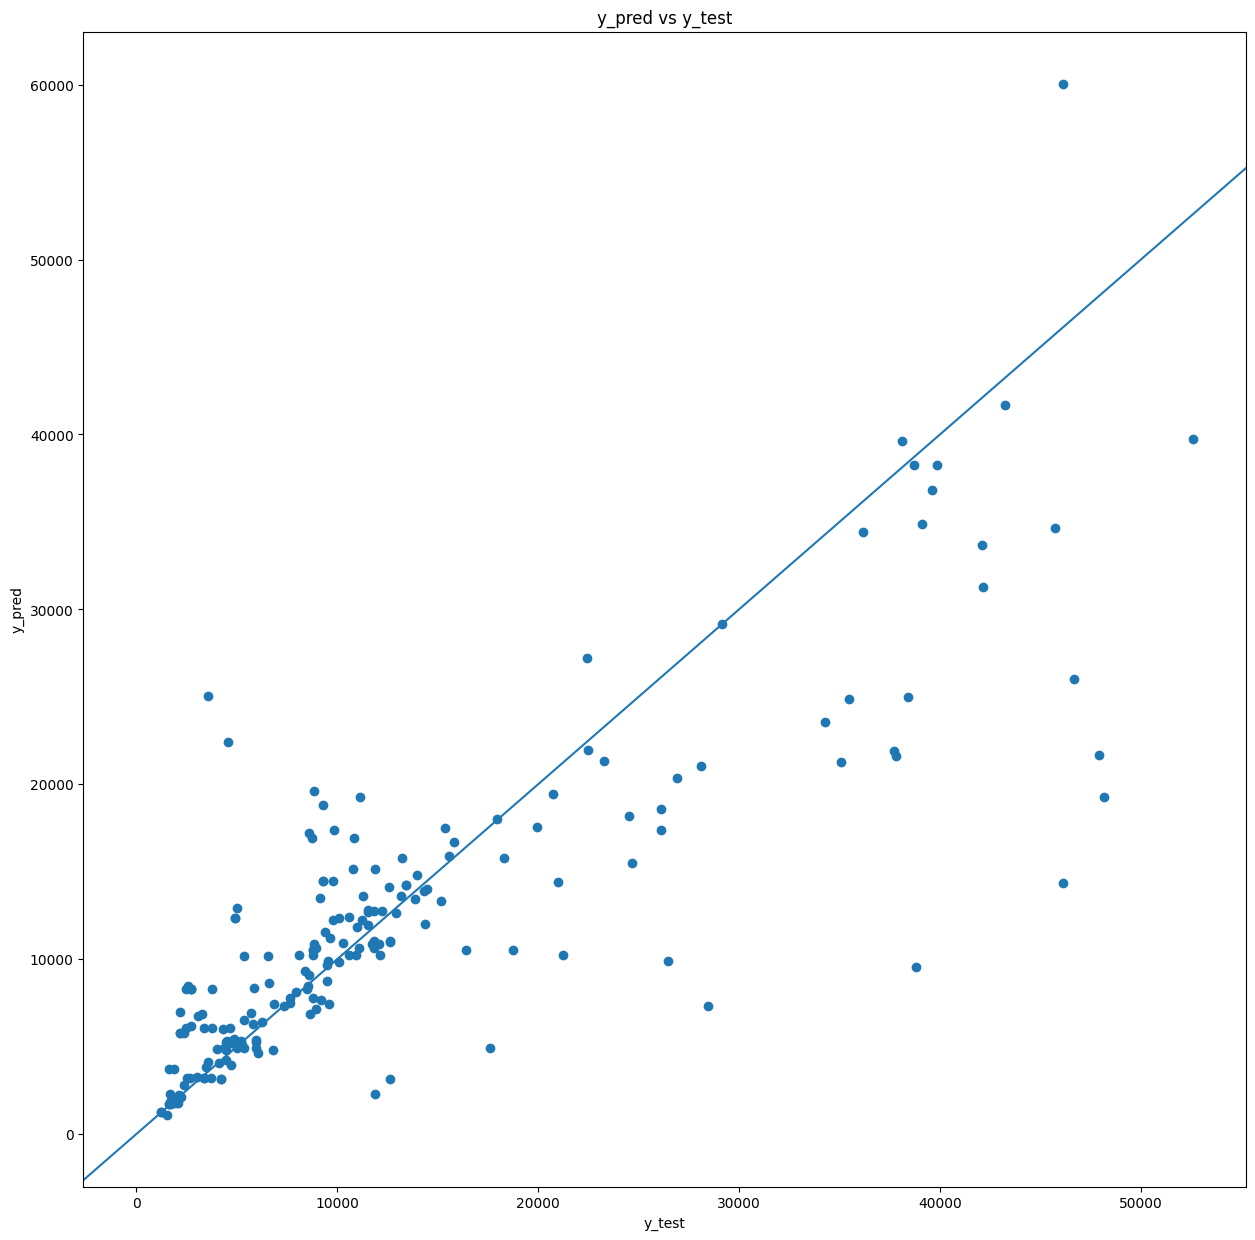

In [98]:
y_pred = knn.predict(X_test)
plt.pyplot.figure(figsize=(15,15))
plt.pyplot.scatter(y_test,y_pred)

plt.pyplot.axline((0,0),slope=1)
plt.pyplot.xlabel('y_test')
plt.pyplot.ylabel('y_pred')
plt.pyplot.title('y_pred vs y_test')

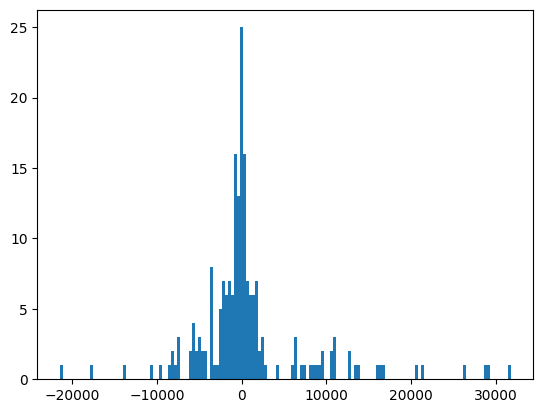

In [99]:
residuals = y_test - y_pred
plt.pyplot.hist(residuals, bins=150)
plt.pyplot.show()